# Healthcare - Studying the data of diabetic patients

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd  

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
dataset = pd.read_csv("Diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Encoding of Independent & Dependent Data

In [8]:
X = dataset.iloc[:-1 , 0:-1]
y = dataset.iloc[:-1 , -1]

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    0
766    1
Name: Outcome, Length: 767, dtype: int64


## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, shuffle=True)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((575, 8), (575,), (192, 8), (192,))

## Logistic Regression

In [13]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'newton-cg' ,max_iter = 20)
lr.fit(X_train, y_train)
y_predLR = lr.predict(X_test)

acc_lrTrain = lr.score(X_train, y_train) * 100
acc_lrTest = accuracy_score(y_predLR, y_test) * 100
print("Training Accuracy: ", acc_lrTrain)
print("Validation Accuracy: ", acc_lrTest)

Training Accuracy:  76.52173913043478
Validation Accuracy:  80.72916666666666


In [15]:
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       126
           1       0.75      0.65      0.70        66

    accuracy                           0.81       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



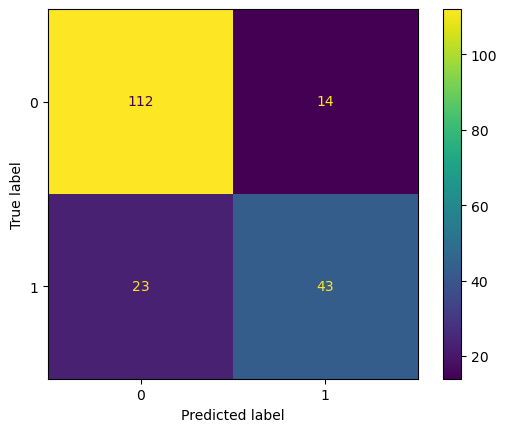

In [16]:
conf_matrix_LR = plot_confusion_matrix(lr, X_test, y_test)